In [14]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess as sp
import time
import multiprocessing as mp
import random
colors = "rgbcmykw"
getVals = lambda x: list(dict(x).values())
getKeys = lambda x: list(dict(x).keys())

In [202]:
def failures(G):
    G = G.copy()
    size = len(G.nodes)
    fractionRemoved = []
    fractionLargest = []
    
    nSteps = np.int32(np.linspace(1, int(0.99*size), num=20))
    removalsPerStep = np.append([0], np.diff(nSteps)) # First run performs no removals

    for n, removals in zip(nSteps, removalsPerStep):
        print(n, end=" ")
        
        for i in range(removals):
            node = random.choice(list(G.nodes))
            G.remove_node(node) 
        
        largest = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
        
        fractionLargest.append(len(largest.nodes)/size)
        fractionRemoved.append(n/size)

    return np.array(fractionLargest), np.array(fractionRemoved)

def failuresAverage(graph_generator, repeat=10):
    allLarg = None
    allRem  = None
    
    for i in range(repeat):
        larg, rem = failures(graph_generator())
        
        if allLarg is None:
            allLarg = larg
            allRem = rem
        else:
            allLarg = allLarg + larg
            allRem  = allRem + rem
    
    return allLarg / repeat, allRem / repeat


result = failuresAverage(lambda: nx.erdos_renyi_graph(1000, 0.001))

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 

(array([0.0789, 0.0542, 0.0468, 0.0419, 0.0304, 0.0223, 0.0167, 0.0142,
        0.011 , 0.0089, 0.0074, 0.0064, 0.0054, 0.0051, 0.0043, 0.0037,
        0.0035, 0.0026, 0.002 , 0.001 ]),
 array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
        0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
        0.937, 0.99 ]))

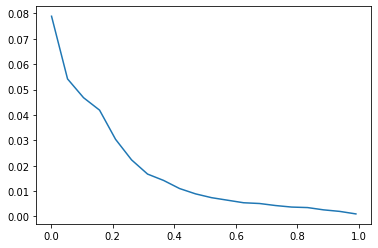

In [203]:
plt.plot(result[1], result[0])
result

In [113]:
def attacks(G):
    G = G.copy()
    size = len(G.nodes)
    fractionRemoved = []
    fractionLargest = []
    
    nSteps = np.int32(np.linspace(1, int(0.99*size), num=20))
    removalsPerStep = np.append([0], np.diff(nSteps)) # First run performs no removals

    for n, removals in zip(nSteps, removalsPerStep):
        print(n, end=" ")
        
        for i in range(removals):
            # Matrix of two columns (key, value)
            M = np.matrix(list(G.degree))
            idx = np.argmax(M[:,1]) # Row index of maximum degree
            node = M[idx,0]
            G.remove_node(node)
        
        largest = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
        
        fractionLargest.append(len(largest.nodes)/size) #store the size of the largest component
        fractionRemoved.append(n/size)

    return np.array(fractionLargest), np.array(fractionRemoved)

def attacksAverage(graph_generator, repeat=10):
    allLarg = None
    allRem  = None
    
    for i in range(repeat):
        larg, rem = failures(graph_generator())
        
        if allLarg is None:
            allLarg = larg
            allRem = rem
        else:
            allLarg = allLarg + larg
            allRem  = allRem + rem
    
    return allLarg / repeat, allRem / repeat


result2 = attacksAverage(lambda: nx.erdos_renyi_graph(1000, 0.001))

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 

Text(0, 0.5, 'Size of largest component')

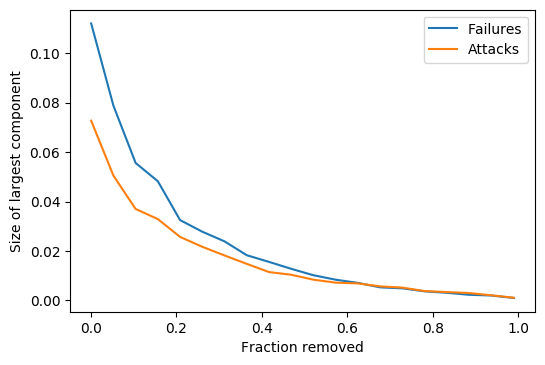

In [122]:
plt.figure(dpi=100)
plt.plot(result[1], result[0], label="Failures")
plt.plot(result2[1], result2[0], label="Attacks")
plt.legend()
plt.xlabel("Fraction removed")
plt.ylabel("Size of largest component")

In [186]:
def moment2(G):
    values = getVals(G.degree)
    probs, bins = np.histogram(values, density=True, bins=np.arange(0, max(values)+2))
    degs = bins[:-1] # The last bin is the right open bound of the last interval
    return (degs**2).dot(probs)

def criticalF(G):
    m1 = np.mean(getVals(G.degree))
    m2 = moment2(G)
    return 1 - 1 / (m2 / m1 - 1)

G = nx.erdos_renyi_graph(1000, 0.001)
criticalF(G)

0.05653710247349841

# Problem 1

In [205]:
result = dict()
result["erdos-renyi"] = failuresAverage(lambda: nx.erdos_renyi_graph(1000, 10 / 999), repeat=10)
result["watts-strogatz-0.1"] = failuresAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.1), repeat=10)
result["watts-strogatz-0.01"] = failuresAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.01), repeat=10)
result["watts-strogatz-0.001"] = failuresAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.001), repeat=10)
result["barabasi-albert"] = failuresAverage(lambda: nx.generators.barabasi_albert_graph(1000, 5), repeat=10)
result

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

{'erdos-renyi': (array([0.9999, 0.9479, 0.896 , 0.8438, 0.7917, 0.7393, 0.6869, 0.6349,
         0.5821, 0.5288, 0.4758, 0.4212, 0.3658, 0.3087, 0.2507, 0.1869,
         0.1125, 0.0293, 0.0075, 0.0017]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.1': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.688 , 0.636 ,
         0.584 , 0.5314, 0.4757, 0.418 , 0.3543, 0.261 , 0.1462, 0.055 ,
         0.0237, 0.0086, 0.0043, 0.0013]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.01': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.688 , 0.6352,
         0.5558, 0.4521, 0.3434, 0.1902, 0.0875, 0.052 , 0.0302, 0.0201,
         0.0121, 0.0069, 0.0043, 0.0017]),
  array([0.001, 0.053, 0.105, 0.1

Text(0.5, 1.0, 'Failure analysis averaged over 10 trials')

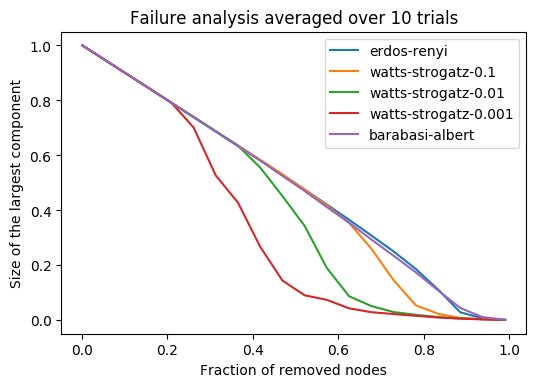

In [207]:
plt.figure(dpi=100)
for k in result:
    vectors = result[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Failure analysis averaged over 10 trials")

In [208]:
result = dict()
result["erdos-renyi"] = attacksAverage(lambda: nx.erdos_renyi_graph(1000, 10 / 999), repeat=10)
result["watts-strogatz-0.1"] = attacksAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.1), repeat=10)
result["watts-strogatz-0.01"] = attacksAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.01), repeat=10)
result["watts-strogatz-0.001"] = attacksAverage(lambda: nx.generators.watts_strogatz_graph(1000, 10, 0.001), repeat=10)
result["barabasi-albert"] = attacksAverage(lambda: nx.generators.barabasi_albert_graph(1000, 5), repeat=10)
result

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

{'erdos-renyi': (array([1.    , 0.9479, 0.8959, 0.8439, 0.7919, 0.7395, 0.6873, 0.6346,
         0.5813, 0.529 , 0.4758, 0.4213, 0.3661, 0.3086, 0.2493, 0.1819,
         0.1012, 0.0238, 0.0065, 0.0011]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.1': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.688 , 0.636 ,
         0.584 , 0.5319, 0.4767, 0.4215, 0.3554, 0.2837, 0.1899, 0.0845,
         0.0343, 0.0104, 0.0055, 0.0012]),
  array([0.001, 0.053, 0.105, 0.157, 0.209, 0.261, 0.313, 0.365, 0.417,
         0.469, 0.521, 0.573, 0.625, 0.677, 0.729, 0.781, 0.833, 0.885,
         0.937, 0.99 ])),
 'watts-strogatz-0.01': (array([1.    , 0.948 , 0.896 , 0.844 , 0.792 , 0.74  , 0.6865, 0.6229,
         0.5541, 0.4636, 0.3187, 0.1598, 0.1023, 0.0459, 0.0305, 0.0171,
         0.0103, 0.0069, 0.004 , 0.0016]),
  array([0.001, 0.053, 0.105, 0.1

Text(0.5, 1.0, 'Attack analysis averaged over 10 trials')

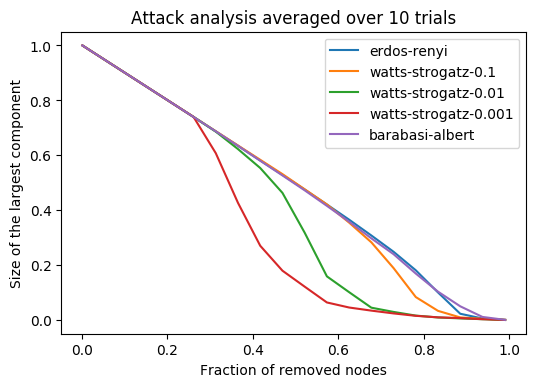

In [209]:
plt.figure(dpi=100)
for k in result:
    vectors = result[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Attack analysis averaged over 10 trials")

### We see that for both cases, attack and failure, the erdos-renyi and barabasi-albert models presented best robustness.

### Small world models presented less robustness. The robustness reduces as the rate of rewiring decreases (lower $p$).

In [210]:
G1 = nx.read_edgelist("maayan-vidal.txt")
G2 = nx.read_edgelist("celegans-protein2007.txt")
G3 = nx.read_edgelist("aegypti.txt")

A = dict()
A["maayan-vidal"] = failuresAverage(lambda: G1, repeat=10)
A["celegans-protein"] = failuresAverage(lambda: G2, repeat=10)
A["aegypti"] = failuresAverage(lambda: G3, repeat=10)

1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 78 156 234 312 390 468 546 624 702 779 857 935 1013 1091 1169 1247 1325 1403 1481 1 78 1

Text(0.5, 1.0, 'Failure analysis averaged over 10 trials')

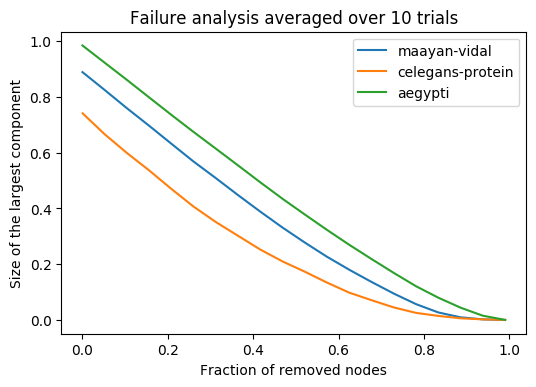

In [211]:
plt.figure(dpi=100)
for k in A:
    vectors = A[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Failure analysis averaged over 10 trials")

In [212]:
B = dict()
B["maayan-vidal"] = attacksAverage(lambda: G1, repeat=10)
B["celegans-protein"] = attacksAverage(lambda: G2, repeat=10)
B["aegypti"] = attacksAverage(lambda: G3, repeat=10)

1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 164 327 490 653 816 979 1143 1306 1469 1632 1795 1958 2122 2285 2448 2611 2774 2937 3101 1 78 156 234 312 390 468 546 624 702 779 857 935 1013 1091 1169 1247 1325 1403 1481 1 78 1

Text(0.5, 1.0, 'Attack analysis averaged over 10 trials')

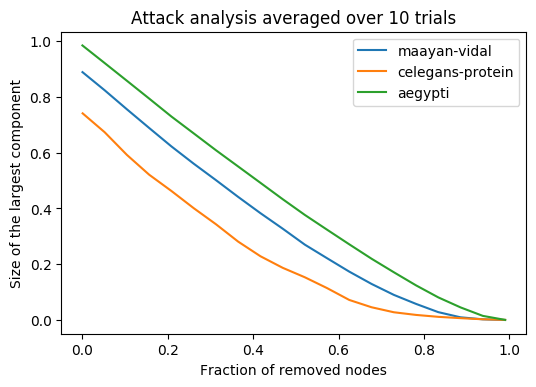

In [214]:
plt.figure(dpi=100)
for k in B:
    vectors = B[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Attack analysis averaged over 10 trials")

### Interestingly enough, the aedes aegypti is the most robust.

In [223]:
strs = ["maayan", "celegans", "aegypti"]
for g, s in zip([G1, G2, G3], strs):
    print(s, nx.average_clustering(g))

maayan 0.06352810615464935
celegans 0.01308985928978111
aegypti 0.13529235173777246


### The higher robustness is likely due to its higher number of edges per node, represented here by its average clustering

In [321]:
allVecs = []
for idx, mu in enumerate([0.1, 0.3, 0.5]):
    G = lambda: nx.community.LFR_benchmark_graph(1000, tau1=3, tau2=1.5, mu=mu, average_degree=5, min_community=50, seed=10)
    vecs = failuresAverage(G, repeat=10)
    allVecs.append(vecs)

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

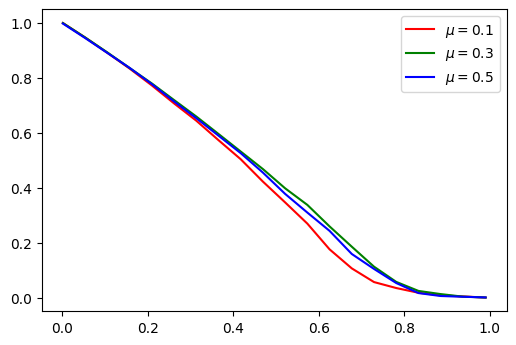

In [322]:
plt.figure(dpi=100)
for idx, mu in enumerate([0.1, 0.3, 0.5]):
    vec = allVecs[idx]
    plt.plot(vec[1], vec[0], c=colors[idx], label="$\mu = {}$".format(mu))
plt.legend()

### Apparently the graph is less robust for low $\mu$, that is, when the communities are more strongly connected, with few edges to other communities.

### This was more than expected; if we take a single community and analyze it in terms of its robustness, the results would likely be very different.

# Problem 1 (BONUS!)

In [581]:
def xalviBrunet(N=1000, assortative=True, rateRewires=0.3, repeatTimes=5):
    # First we create the power law degree sequence
    seq = sorted(np.int32(np.round(nx.utils.powerlaw_sequence(N, 3))))

    if np.sum(seq)%2 == 1:
        seq[-1] += 1

    # Then we get the configuration model
    G = nx.Graph(nx.configuration_model(seq))

    for _ in range(repeatTimes):
        # Now apply Xalvi-Brunet algorithm
        edges = list(G.edges)
        random.shuffle(edges)

        # Take rateRewrite edges
        edges = edges[1:int(rateRewires*len(edges))]

        # Get all nodes
        nodes = np.ravel(edges)

        # Sort them in decreasing order of degree
        degs = np.array([G.degree[i] for i in nodes ])
        idx = np.flip(np.argsort(degs)) # Reverses the array

        degs = degs[idx]
        nodes = nodes[idx]

        if assortative:
            while len(nodes) >= 4:
                G.add_edge(nodes[0], nodes[1])
                G.add_edge(nodes[2], nodes[3])
                nodes = nodes[4:]
        else:
            while len(nodes) >= 4:
                G.add_edge(nodes[0], nodes[-1])
                G.add_edge(nodes[1], nodes[-2])
                nodes = nodes[2:-2]
    
    return G

print("Purely random")
f = lambda: nx.erdos_renyi_graph(1000, 0.001)
print([ nx.degree_assortativity_coefficient(f()) for i in range(10) ])

print("\n\nAssortative Xalvi Brunet")
f = lambda: xalviBrunet(1000, True)
print([ nx.degree_assortativity_coefficient(f()) for i in range(10) ])

print("\n\nDisassortative Xalvi Brunet")
f = lambda: xalviBrunet(1000, False)
print([ nx.degree_assortativity_coefficient(f()) for i in range(10) ])

Purely random
[-0.00521224536246861, -0.0033438349085689427, 0.06473836444911857, -0.057492261632922224, -0.012730268084469308, 0.014786418400876225, -0.03501614219321016, -0.08583991963761152, 0.0036449464850399254, 0.047300781814056926]


Assortative Xalvi Brunet
[0.4375397098631913, 0.24158107047037036, 0.5510243652385012, 0.5172053017105419, 0.3517688643758128, 0.5492174708190093, 0.4323812920244941, 0.4145061359957076, 0.4026561514681585, 0.27796383338462277]


Disassortative Xalvi Brunet
[-0.2950627666960432, -0.2676106743494326, -0.3148922059652333, -0.20306709171079124, -0.1832054510729692, -0.1222582222251641, -0.3164161014382361, -0.2224511566534537, -0.167701227881502, -0.22717322291610473]


In [584]:
A = dict()
f = lambda: nx.erdos_renyi_graph(1000, 0.01)
A["Purely Random"] = failuresAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, True)
A["Assortative"] = failuresAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, False)
A["Disassortative"] = failuresAverage(f, repeat=10)

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

Text(0.5, 1.0, 'Failure analysis averaged over 10 trials')

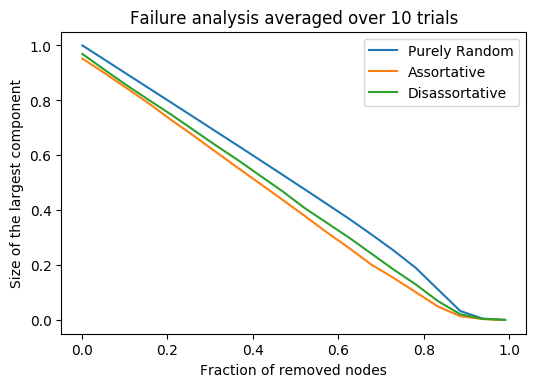

In [585]:
plt.figure(dpi=100)
for k in A:
    vectors = A[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Failure analysis averaged over 10 trials")

In [586]:
A = dict()
f = lambda: nx.erdos_renyi_graph(1000, 0.01)
A["Purely Random"] = attacksAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, True)
A["Assortative"] = attacksAverage(f, repeat=10)

f = lambda: xalviBrunet(1000, False)
A["Disassortative"] = attacksAverage(f, repeat=10)

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990

Text(0.5, 1.0, 'Attack analysis averaged over 10 trials')

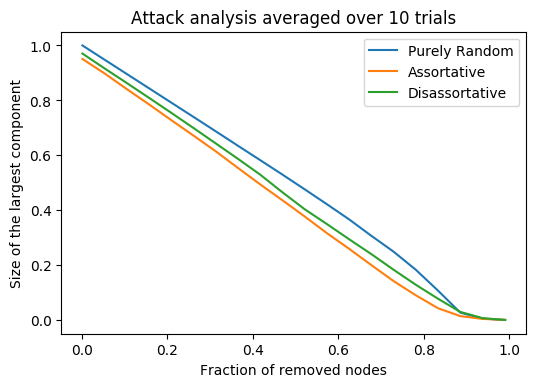

In [587]:
plt.figure(dpi=100)
for k in A:
    vectors = A[k]
    plt.plot(vectors[1], vectors[0], label=k)
plt.legend()
plt.ylabel("Size of the largest component")
plt.xlabel("Fraction of removed nodes")
plt.title("Attack analysis averaged over 10 trials")

### We see that the assortative graph is slighly less robust, but assortativity does not seem that much connected to robustness.